In [4]:

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")
import math
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import plotly.express as px
from IPython.core.display import display
!pip install sodapy
from sodapy import Socrata


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### TALLER M10 
### ANALISIS DE DATOS

### 1) DATASET

In [10]:
trm = pd.read_csv('trm.csv')

 # Convertir columnas de fecha a tipo datetime
trm['VIGENCIADESDE'] = pd.to_datetime(trm['VIGENCIADESDE'], dayfirst=True)
trm['VIGENCIAHASTA'] = pd.to_datetime(trm['VIGENCIAHASTA'], dayfirst=True)
# Modificar nombres de columnas
# trm.columns = ['valor','unidad','vigenciadesde','vigenciahasta']
trm.head()

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
0,4761.64,COP,2022-12-22,2022-12-22
1,4781.28,COP,2022-12-20,2022-12-20
2,4802.48,COP,2022-12-17,2022-12-19
3,4836.24,COP,2022-12-13,2022-12-13
4,4815.99,COP,2022-12-10,2022-12-12


### 2) CALCULO DE
a. Media
b. Mediana
c. Desviación estándar
d. Máximo
e. Mínimo
f. Máximo
g. Rango

In [11]:

#MEDIA
media = trm['VALOR'].mean()

#MEDIANA
mediana = trm['VALOR'].median()

#DESVEST
desviacion_estandar = trm['VALOR'].std()

#MÁXIMO
maximo = trm['VALOR'].max()

#MÍNIMO
minimo = trm['VALOR'].min()

#RANGO
rango = maximo - minimo

#RESULTADOS
print("Media:", media)
print("Mediana:", mediana)
print("Desviación estándar:", desviacion_estandar)
print("Máximo:", maximo)
print("Mínimo:", minimo)
print("Rango:", rango)

Media: 2211.9940722669126
Mediana: 2160.65
Desviación estándar: 948.7020318009862
Máximo: 5061.21
Mínimo: 620.62
Rango: 4440.59


### 3) Resumen de los datos numéricos

In [12]:
resumen = trm.describe()

print(resumen)

             VALOR
count  7583.000000
mean   2211.994072
std     948.702032
min     620.620000
25%    1755.100000
50%    2160.650000
75%    2868.125000
max    5061.210000


### 4) Información general del dataset

In [13]:
info_general = trm.info()

print(info_general)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7583 entries, 0 to 7582
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   VALOR          7583 non-null   float64       
 1   UNIDAD         7583 non-null   object        
 2   VIGENCIADESDE  7583 non-null   datetime64[ns]
 3   VIGENCIAHASTA  7583 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 237.1+ KB
None


### 5) Representaciones graficas acordes a la naturaleza de los datos

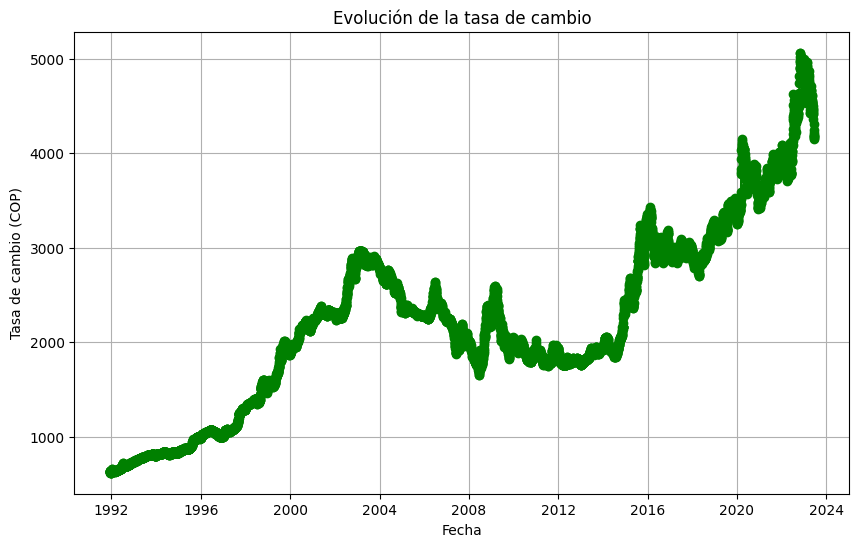

In [14]:
# Ordenar el DataFrame por la columna 'VIGENCIADESDE'
trm = trm.sort_values(by='VIGENCIADESDE')

# Gráfico de línea: Evolución de la tasa de cambio
plt.figure(figsize=(10, 6))
plt.plot(trm['VIGENCIADESDE'], trm['VALOR'], marker='o', color='green')
plt.xlabel('Fecha')
plt.ylabel('Tasa de cambio (COP)')
plt.title('Evolución de la tasa de cambio')
plt.grid(True)
plt.show()

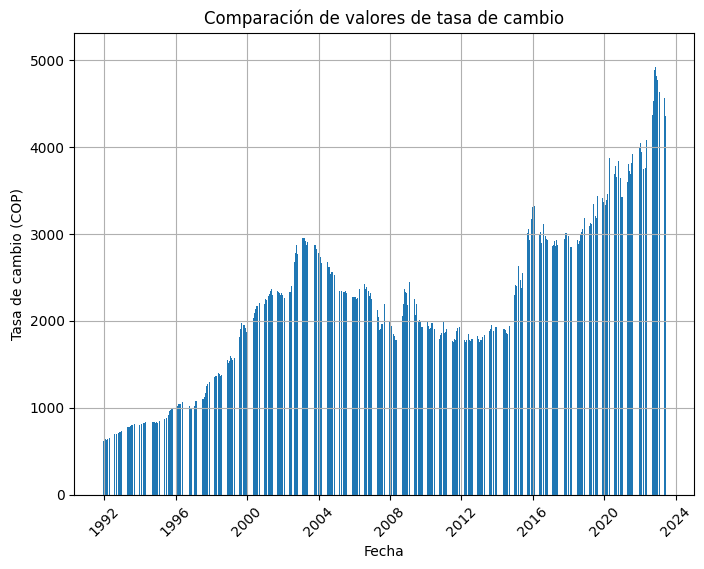

In [15]:
# Gráfico de barras: Comparación de valores de tasa de cambio

plt.figure(figsize=(8, 6))
plt.bar(trm['VIGENCIADESDE'], trm['VALOR'])
plt.xlabel('Fecha')
plt.ylabel('Tasa de cambio (COP)')
plt.title('Comparación de valores de tasa de cambio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 6) Usando Socrata, cargue un dataset que se encuentre en el portal de datos públicos de Colombia

In [16]:
client = Socrata('www.datos.gov.co',None)
results = client.get('6v67-9pip') #Registro de usuarios del servicio publico agropecuaria
#Este conjunto de datos abiertos contiene el nombre de las fincas con su numero de teléfono y la linea productiva que realizan

data = pd.DataFrame.from_records(results)
data.head()


,departamento,municipio,latitud,longitud,geolocalizacion,operadora,contrato,campo,enero,febrero,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre
0,ANTIOQUIA,PUERTO NARE,6.126539139,-74.70317722,"{'type': 'Point', 'coordinates': [-74.70317722...",ECOPETROL S.A.,TECA COCORNA,AREA TECA-COCORNA,1765.84,1689.32,1826.93,1537.57,1238.72,1049.21,975.58,949,943.07,1276.13,1327.46,1256.37
1,ANTIOQUIA,PUERTO NARE,6.126539139,-74.70317722,"{'type': 'Point', 'coordinates': [-74.70317722...",MANSAROVAR ENERGY COLOMBIA LTD,NARE,NARE SUR,187.33,184.97,173.58,191.32,193.94,166.74,168.84,152.02,147.4,155.1,140.81,122.48
2,ANTIOQUIA,PUERTO NARE,6.126539139,-74.70317722,"{'type': 'Point', 'coordinates': [-74.70317722...",MANSAROVAR ENERGY COLOMBIA LTD,NARE,UNDERRIVER,645.83,625.85,632.27,662.28,569.9,443.57,545.7,523.7,448.83,522.13,502.12,466.15
3,ANTIOQUIA,PUERTO TRIUNFO,5.954830151,-74.6861918,"{'type': 'Point', 'coordinates': [-74.6861918,...",ECOPETROL S.A.,TECA COCORNA,AREA TECA-COCORNA,119.7,118.32,81.96,0,0,0,14.05,104.08,94.44,76.66,76.14,74.72
4,ANTIOQUIA,YONDO,6.925159318,-74.15824041,"{'type': 'Point', 'coordinates': [-74.15824041...",ECOPETROL S.A.,MAGDALENA MEDIO-CASABE,CASABE,11636.58,11584.22,11488.16,10711.52,9483.4,9402.73,9599.38,9527.73,9991.97,10483.05,10633.2,10530.89


In [17]:
data.departamento.unique()

array(['ANTIOQUIA', 'ARAUCA', 'ATLANTICO', 'BOLIVAR', 'BOYACA',
       'CASANARE', 'CAUCA', 'CESAR', 'CORDOBA', 'CUNDINAMARCA', 'HUILA',
       'MAGDALENA', 'META', 'SANTANDER', 'NARIÑO', 'NORTE DE SANTANDER',
       'PUTUMAYO', 'SUCRE', 'TOLIMA'], dtype=object)

### 7) Tareas de limpieza y transformación necesarias

In [18]:
# Buscar valores faltantes
missing_values = data.isnull().sum()
print(missing_values)
total_missing = missing_values.sum()
print("Total de valores faltantes: ", total_missing)


departamento       0
municipio          0
latitud            0
longitud           0
geolocalizacion    0
operadora          0
contrato           0
campo              0
enero              0
febrero            0
marzo              0
abril              0
mayo               0
junio              0
julio              0
agosto             0
septiembre         0
octubre            0
noviembre          0
diciembre          0
dtype: int64
Total de valores faltantes:  0


In [19]:
#Eliminar columnas irrelevantes
data = data.drop(['geolocalizacion', 'latitud', 'longitud'], axis=1)

In [20]:
#Convertir valores a números
meses = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
data[meses] = data[meses].astype(float)

In [21]:
#llenar los na con 0
data = data.fillna(0)

In [22]:
data.head()

,departamento,municipio,operadora,contrato,campo,enero,febrero,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre
0,ANTIOQUIA,PUERTO NARE,ECOPETROL S.A.,TECA COCORNA,AREA TECA-COCORNA,1765.84,1689.32,1826.93,1537.57,1238.72,1049.21,975.58,949.00,943.07,1276.13,1327.46,1256.37
1,ANTIOQUIA,PUERTO NARE,MANSAROVAR ENERGY COLOMBIA LTD,NARE,NARE SUR,187.33,184.97,173.58,191.32,193.94,166.74,168.84,152.02,147.40,155.10,140.81,122.48
2,ANTIOQUIA,PUERTO NARE,MANSAROVAR ENERGY COLOMBIA LTD,NARE,UNDERRIVER,645.83,625.85,632.27,662.28,569.90,443.57,545.70,523.70,448.83,522.13,502.12,466.15
3,ANTIOQUIA,PUERTO TRIUNFO,ECOPETROL S.A.,TECA COCORNA,AREA TECA-COCORNA,119.70,118.32,81.96,0.00,0.00,0.00,14.05,104.08,94.44,76.66,76.14,74.72
4,ANTIOQUIA,YONDO,ECOPETROL S.A.,MAGDALENA MEDIO-CASABE,CASABE,11636.58,11584.22,11488.16,10711.52,9483.40,9402.73,9599.38,9527.73,9991.97,10483.05,10633.20,10530.89


### 8) Dataset mostrando datos estadísticos y gráficas

In [23]:
statistics = data.describe()
print(statistics)

               enero        febrero          marzo         abril  \
count     445.000000     445.000000     445.000000    445.000000   
mean     1986.325978    1973.908539    1926.096337   1789.132539   
std      8179.355327    8105.678940    7814.530023   7388.682922   
min         0.000000       0.000000       0.000000      0.000000   
25%        61.260000      57.090000      47.230000      0.560000   
50%       225.940000     222.490000     195.480000    147.150000   
75%       926.930000     961.900000     947.710000    839.960000   
max    116724.040000  115914.440000  105539.250000  99942.110000   

                mayo          junio          julio         agosto  \
count     445.000000     445.000000     445.000000     445.000000   
mean     1645.564382    1640.236270    1651.655258    1667.619573   
std      7212.601762    7267.839945    7455.823338    7472.544281   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

In [24]:
# Suma de producción por operadora
produccion_operadora = data.groupby('operadora')[['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']].sum()

# Filtrar operadoras con producción total menor a 5000
operadoras_filtradas = produccion_operadora[produccion_operadora.sum(axis=1) >= 5000]

# Filtrar el DataFrame original con las operadoras seleccionadas
data_filtrado = data[data['operadora'].isin(operadoras_filtradas.index)]


### Se hacen los filtros debido a que el dataset tiene demasiados datos en campo y operadora lo cual hace que las gráficas queden muy poco estéticas, aquí un ejemplo:

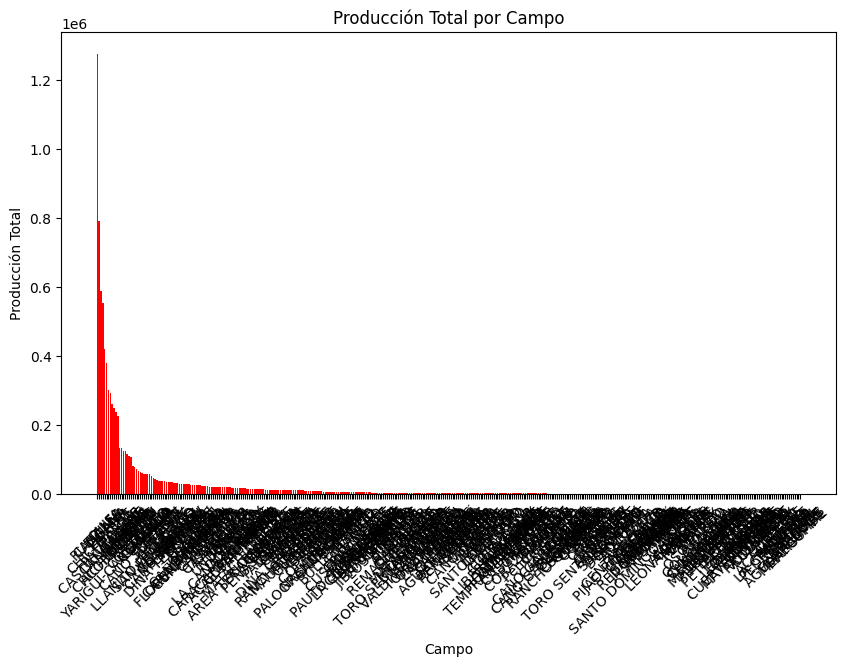

In [25]:
# Gráfico de barras de producción total por campo
produccion_total = data_filtrado.groupby('campo').sum().sum(axis=1)
produccion_total = produccion_total.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(produccion_total.index, produccion_total, color='red')
plt.xlabel('Campo')
plt.ylabel('Producción Total')
plt.title('Producción Total por Campo')
plt.xticks(rotation=45)
plt.show()


### La siguiente tabla es resultado del filtro de datos para obtener como resultado las 10 operadoras con mayor produccion de manera descendente.

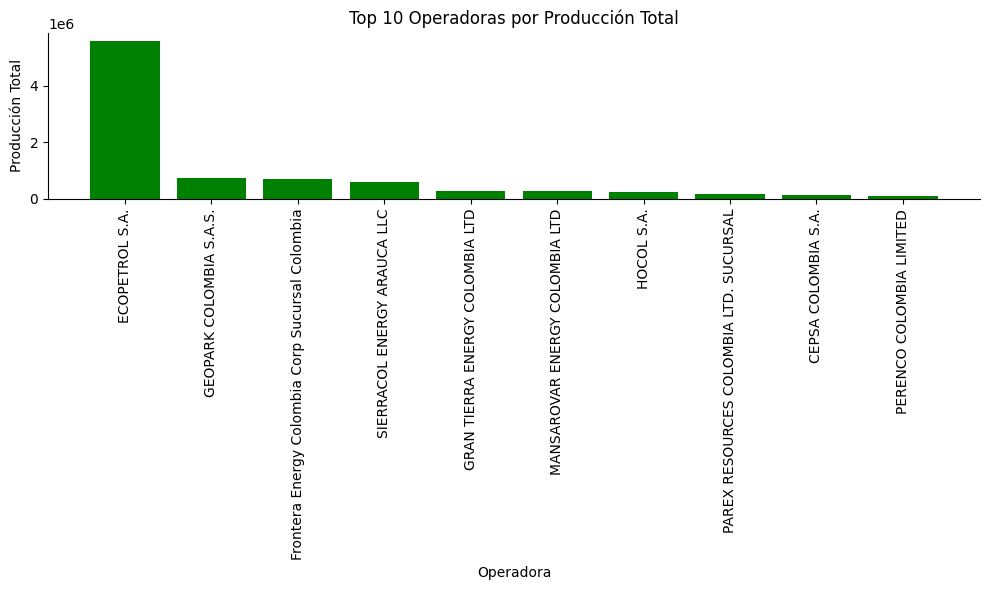

In [26]:
#Suma de producción por operadora
produccion_operadora = data_filtrado.groupby('operadora')[['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']].sum()

#Operadoras por producción total
operadoras_ordenadas = produccion_operadora.sum(axis=1).sort_values(ascending=False)

# Top 10 operadoras por produccion total
top_operadoras = operadoras_ordenadas.head(10)

#Gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(top_operadoras.index, top_operadoras.values, color='green')
ax.set_xlabel('Operadora')
ax.set_ylabel('Producción Total')
ax.set_title('Top 10 Operadoras por Producción Total')
ax.tick_params(axis='x', rotation=90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


### La siguinte tabla filtra datos para mostrar las 10 operadoras con mayor produccion en diciembre en el departamento del Casanare

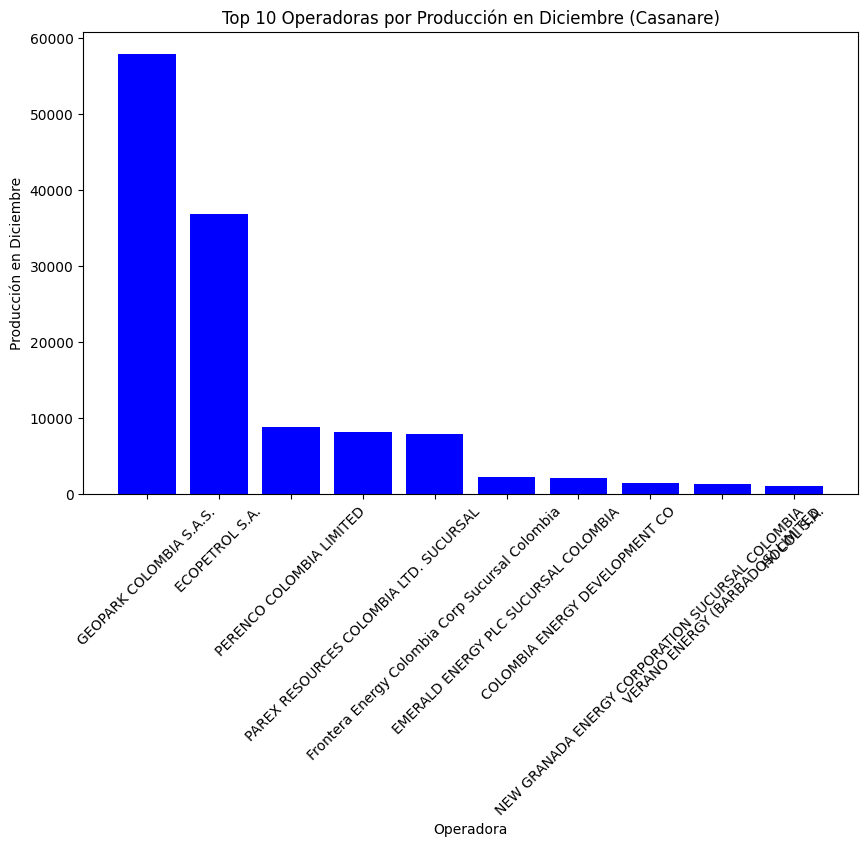

In [27]:
# Filtrar datos para el departamento de Casanare y su producción en diciembre
data_antioquia_diciembre = data[(data['departamento'] == 'CASANARE') & (data['diciembre'] >= 0)]

# Calcular la producción total de cada operadora en diciembre
produccion_operadoras = data_antioquia_diciembre.groupby('operadora')['diciembre'].sum()
produccion_operadoras = produccion_operadoras.sort_values(ascending=False)[:10]

# Gráfico
plt.figure(figsize=(10, 6))
plt.bar(produccion_operadoras.index, produccion_operadoras, color='blue')
plt.xlabel('Operadora')
plt.ylabel('Producción en Diciembre')
plt.title('Top 10 Operadoras por Producción en Diciembre (Casanare)')
plt.xticks(rotation=45)
plt.show()

### 9) Tabla pivot y agrupación

###### Esta tabla pivote tiene un índice de "operadora" y muestra las sumas y desviaciones estándar de las columnas "enero", "febrero" y "marzo" para cada operadora. Además, se agrega una fila adicional al final de la tabla llamada "All" (Margen) que muestra las sumas y desviaciones estándar de todas las operadoras.

In [28]:
tabla=pd.pivot_table(data,index=["operadora"],
                               values=['enero','febrero','marzo'],
                               aggfunc=[np.sum,np.std], margins=True)

#Adding color gradient
cm = sns.light_palette("red", as_cmap=True)
tabla.style.background_gradient(cmap=cm)